In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Load your datasets
temperature_df = pd.read_csv('/content/drive/MyDrive/iot/temperature.csv', parse_dates=['time'], index_col='time')
humidity_df = pd.read_csv('/content/drive/MyDrive/iot/humidity.csv', parse_dates=['time'], index_col='time')
waterlevel_df = pd.read_csv('/content/drive/MyDrive/iot/waterlevel.csv', parse_dates=['time'], index_col='time')

In [53]:
# Inspect the datasets
print(temperature_df.info())
print(humidity_df.info())
print(waterlevel_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5896 entries, 2025-04-27T19:04:12.205Z to 2025-05-01T22:32:53.645Z
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   5896 non-null   float64
dtypes: float64(1)
memory usage: 92.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6111 entries, 2025-04-27T18:30:02.197Z to 2025-05-02T13:32:42.245Z
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   6111 non-null   int64
dtypes: int64(1)
memory usage: 95.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 34107 entries, 2025-05-02T09:06:23.026Z to 2025-05-01T22:32:58.855Z
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   34107 non-null  int64
dtypes: int64(1)
memory usage: 532.9+ KB
None


<Axes: title={'center': 'Temperature Time Series'}, xlabel='time'>

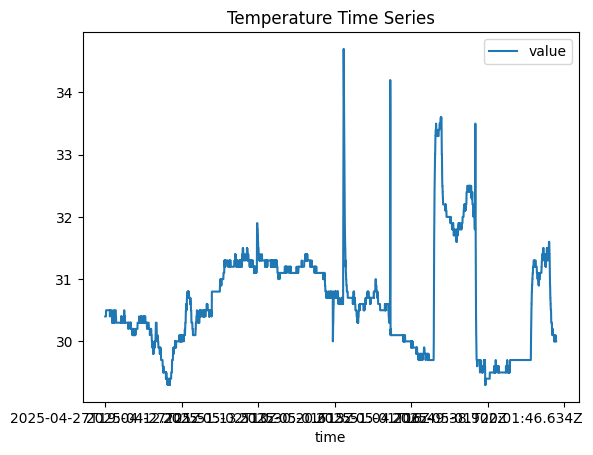

In [54]:
# Plot the datasets
temperature_df.plot(title='Temperature Time Series')

<Axes: title={'center': 'Humidity Time Series'}, xlabel='time'>

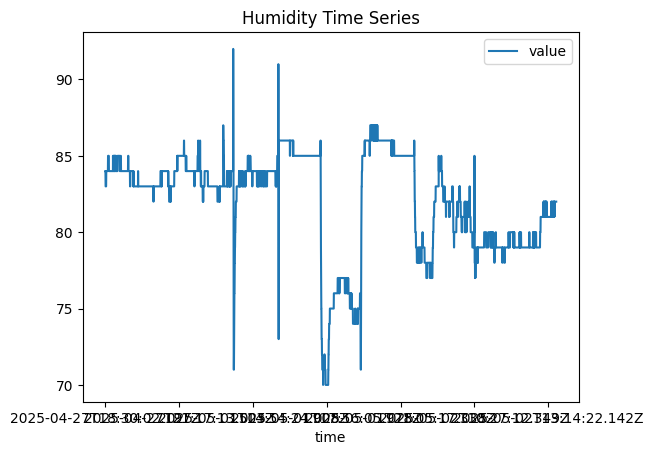

In [55]:
humidity_df.plot(title='Humidity Time Series')

<Axes: title={'center': 'Water Level Time Series'}, xlabel='time'>

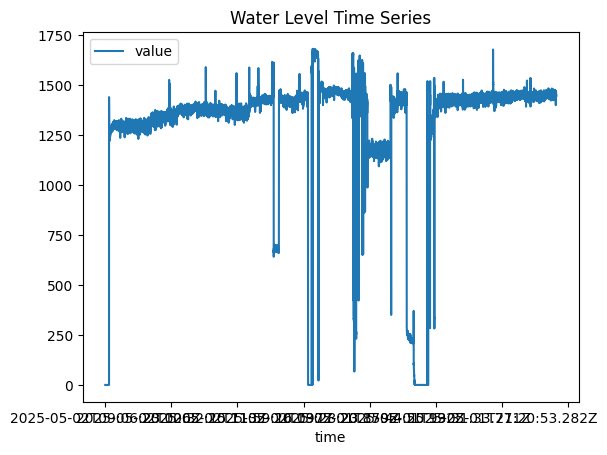

In [56]:
waterlevel_df.plot(title='Water Level Time Series')

In [57]:
# Transform data to log scale
temperature_df['value'] = np.log(temperature_df['value'])
humidity_df['value'] = np.log(humidity_df['value'])
waterlevel_df['value'] = np.log(waterlevel_df['value'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Log Transformed Temperature'}, xlabel='time'>

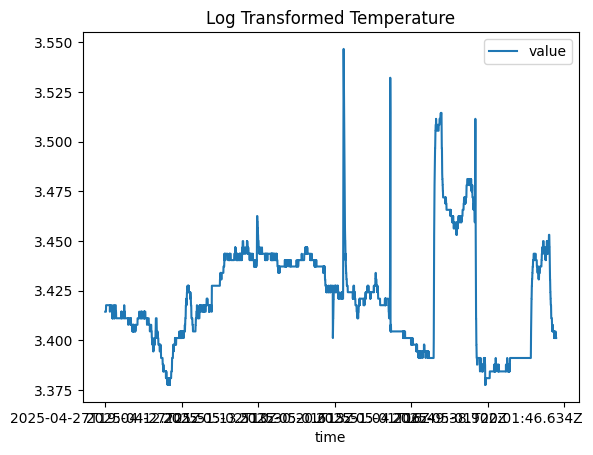

In [58]:
# Plot the transformed data
temperature_df.plot(title='Log Transformed Temperature')

<Axes: title={'center': 'Log Transformed Humidity'}, xlabel='time'>

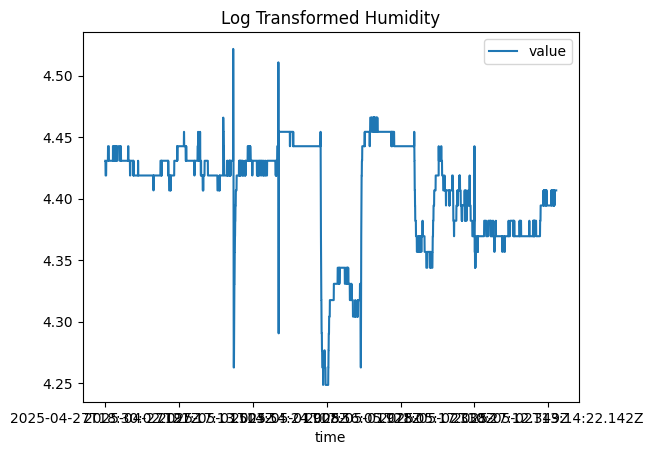

In [59]:
humidity_df.plot(title='Log Transformed Humidity')

<Axes: title={'center': 'Log Transformed Water Level'}, xlabel='time'>

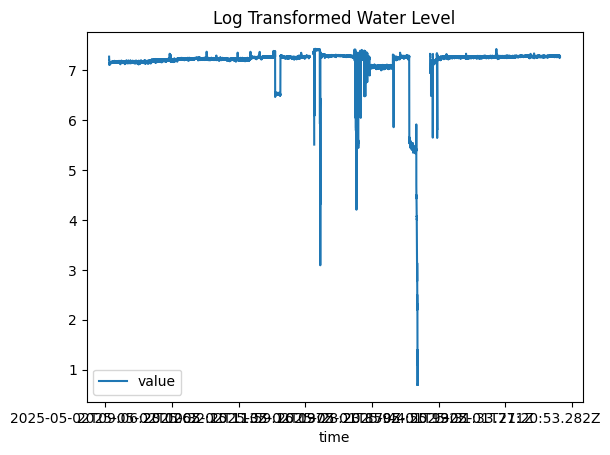

In [60]:
waterlevel_df.plot(title='Log Transformed Water Level')

In [61]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

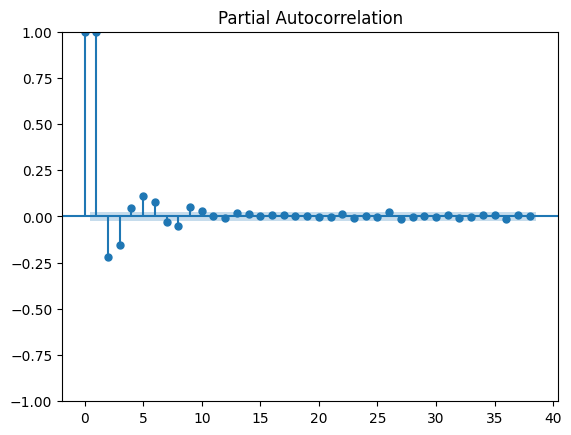

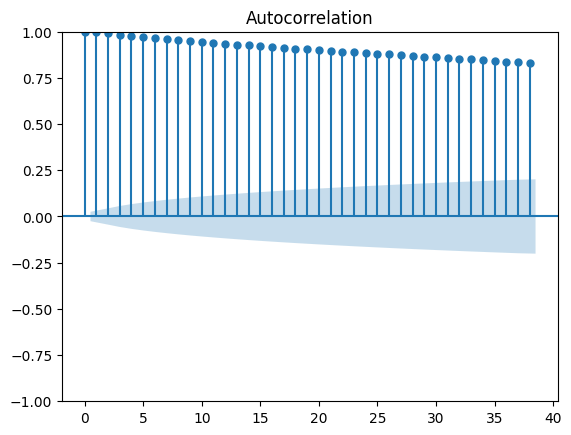

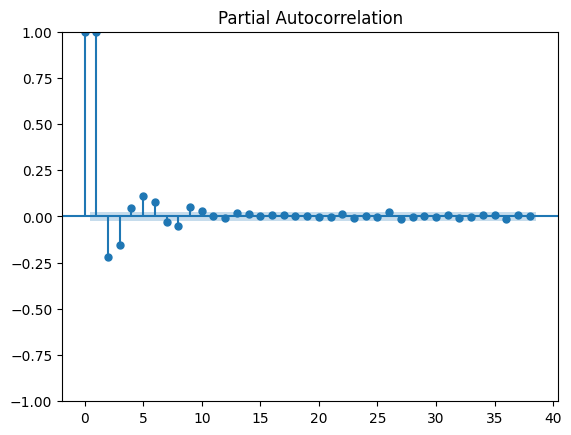

In [62]:
# ACF and PACF for temperature
plot_acf(temperature_df['value'].dropna())
plot_pacf(temperature_df['value'].dropna())

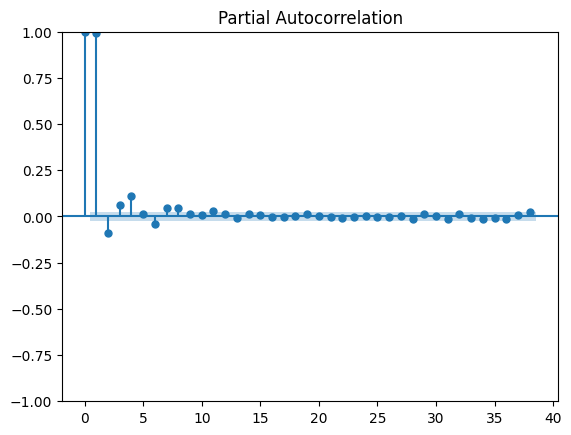

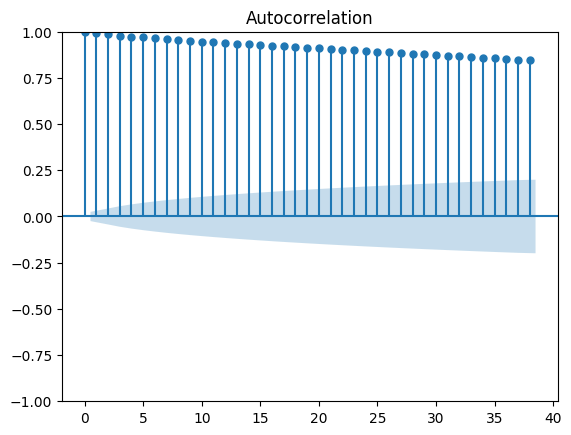

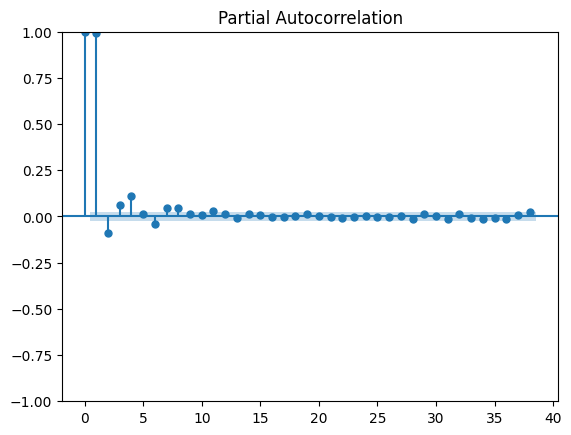

In [63]:
# ACF and PACF for humidity
plot_acf(humidity_df['value'].dropna())
plot_pacf(humidity_df['value'].dropna())

In [64]:
from statsmodels.tsa.stattools import adfuller

In [65]:
# ADF test for temperature
adf_temp = adfuller(temperature_df['value'].dropna())
print(f'Temperature p-value: {adf_temp[1]}')

Temperature p-value: 0.0032167396101453337


In [66]:
# ADF test for humidity
adf_humidity = adfuller(humidity_df['value'].dropna())
print(f'Humidity p-value: {adf_humidity[1]}')

Humidity p-value: 0.006270503897589475


In [67]:
# ## Transform to stationary: Differencing

temperature_df_diff = temperature_df.diff().dropna()
humidity_df_diff = humidity_df.diff().dropna()
waterlevel_df_diff = waterlevel_df.diff().dropna()

<Axes: title={'center': 'Differenced Temperature'}, xlabel='time'>

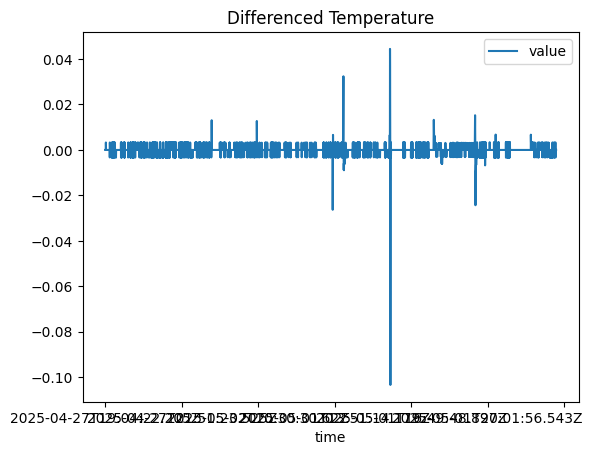

In [68]:
# Plot differenced data
temperature_df_diff.plot(title='Differenced Temperature')

<Axes: title={'center': 'Differenced Humidity'}, xlabel='time'>

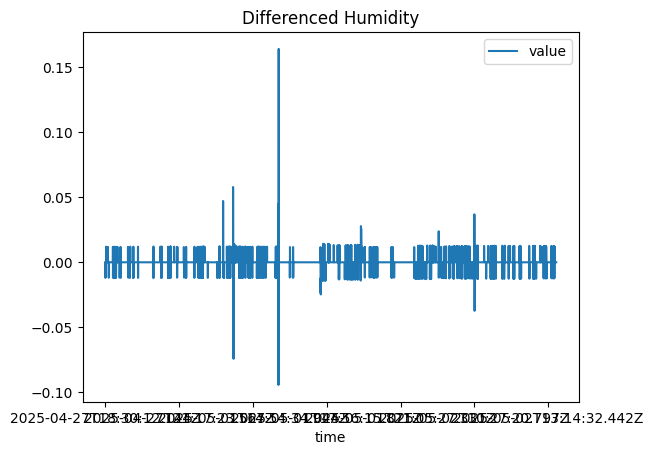

In [69]:
humidity_df_diff.plot(title='Differenced Humidity')

<Axes: title={'center': 'Differenced Water Level'}, xlabel='time'>

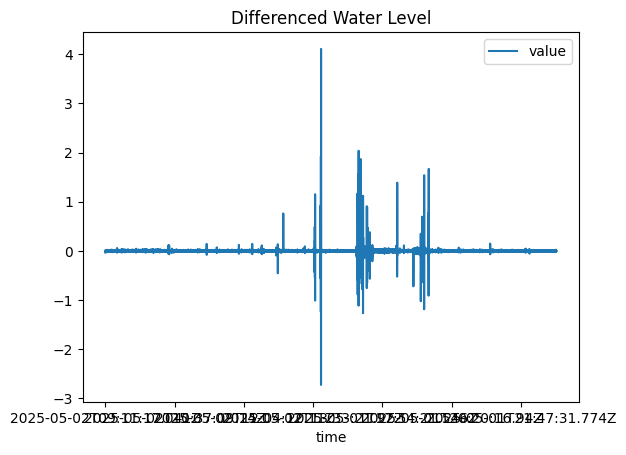

In [70]:
waterlevel_df_diff.plot(title='Differenced Water Level')

In [71]:

from statsmodels.tsa.arima.model import ARIMA

In [72]:
# Fit ARIMA model for temperature
model_temp = ARIMA(temperature_df, order=(2,1,0))
model_temp_fit = model_temp.fit()
print(model_temp_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 5896
Model:                 ARIMA(2, 1, 0)   Log Likelihood               27647.967
Date:                Fri, 02 May 2025   AIC                         -55289.933
Time:                        14:51:54   BIC                         -55269.888
Sample:                             0   HQIC                        -55282.966
                               - 5896                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1858      0.002     75.293      0.000       0.181       0.191
ar.L2          0.1556      0.002     63.083      0.000       0.151       0.160
sigma2      4.939e-06   5.58e-09    885.128      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [73]:
# Fit ARIMA model for humidity
model_humidity = ARIMA(humidity_df, order=(2,1,0))
model_humidity_fit = model_humidity.fit()
print(model_humidity_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 6111
Model:                 ARIMA(2, 1, 0)   Log Likelihood               24040.596
Date:                Fri, 02 May 2025   AIC                         -48075.191
Time:                        14:51:55   BIC                         -48055.038
Sample:                             0   HQIC                        -48068.199
                               - 6111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0939      0.003     33.669      0.000       0.088       0.099
ar.L2         -0.0656      0.003    -19.226      0.000      -0.072      -0.059
sigma2      2.238e-05   6.53e-08    342.897      0.0

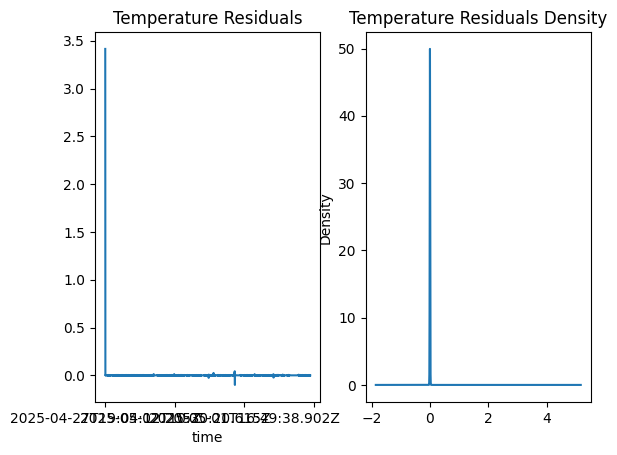

In [74]:
# # Step 4: Make time series predictions

# Residual plots for temperature
residuals_temp = model_temp_fit.resid
fig, ax = plt.subplots(1, 2)
residuals_temp.plot(title='Temperature Residuals', ax=ax[0])
residuals_temp.plot(title='Temperature Residuals Density', kind='kde', ax=ax[1])
plt.show()

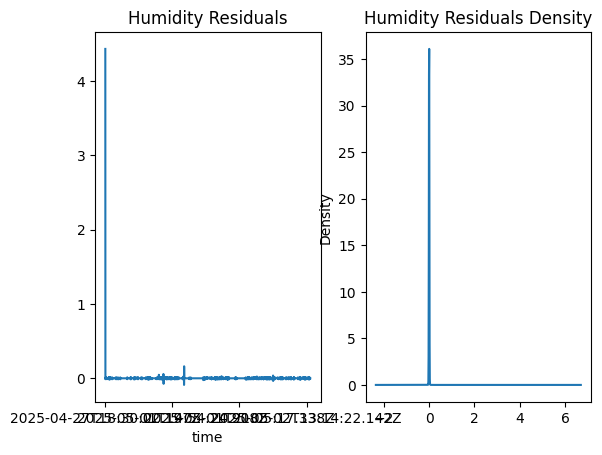

In [75]:

# Residual plots for humidity
residuals_humidity = model_humidity_fit.resid
fig, ax = plt.subplots(1, 2)
residuals_humidity.plot(title='Humidity Residuals', ax=ax[0])
residuals_humidity.plot(title='Humidity Residuals Density', kind='kde', ax=ax[1])
plt.show()

In [76]:

# Step 0: Split data into training and test sets

# Define the training and test data (last 30 points for testing)
train_size = int(len(temperature_df) * 0.8)  # Use 80% for training
temperature_df_train, temperature_df_test = temperature_df[:train_size], temperature_df[train_size:]
humidity_df_train, humidity_df_test = humidity_df[:train_size], humidity_df[train_size:]
waterlevel_df_train, waterlevel_df_test = waterlevel_df[:train_size], waterlevel_df[train_size:]


In [77]:
# # Step 4: Make time series predictions (Updated)

# Forecast for temperature (now using the correct test dataset)
forecast_temp = model_temp_fit.forecast(len(temperature_df_test))
temperature_df['forecast_temp'] = [None] * len(temperature_df_train) + list(forecast_temp)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [78]:
# Forecast for humidity
forecast_humidity = model_humidity_fit.forecast(len(humidity_df_test))
humidity_df['forecast_humidity'] = [None] * len(humidity_df_train) + list(forecast_humidity)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='time'>

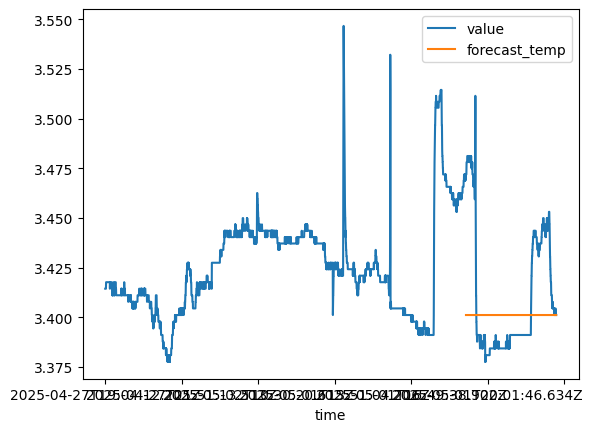

In [79]:
# Plot the forecasts
temperature_df.plot()

<Axes: xlabel='time'>

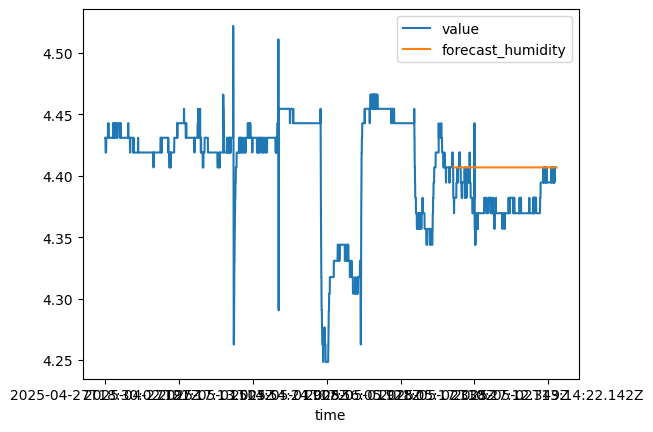

In [80]:
humidity_df.plot()

In [81]:
# # Evaluate model performance

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [82]:
mae_temp = mean_absolute_error(temperature_df_test, forecast_temp)
mape_temp = mean_absolute_percentage_error(temperature_df_test, forecast_temp)
rmse_temp = np.sqrt(mean_squared_error(temperature_df_test, forecast_temp))

mae_humidity = mean_absolute_error(humidity_df_test, forecast_humidity)
mape_humidity = mean_absolute_percentage_error(humidity_df_test, forecast_humidity)
rmse_humidity = np.sqrt(mean_squared_error(humidity_df_test, forecast_humidity))


In [83]:
print(f"Temperature MAE: {mae_temp}, MAPE: {mape_temp}, RMSE: {rmse_temp}")
print(f"Humidity MAE: {mae_humidity}, MAPE: {mape_humidity}, RMSE: {rmse_humidity}")

Temperature MAE: 0.02508982811172703, MAPE: 0.007303984545165816, RMSE: 0.03300816129888056
Humidity MAE: 0.027151584101758938, MAPE: 0.00620906585695797, RMSE: 0.030348187530725938
